# 実践課題 vol.1
AI_STANDARD 機械学習講座vol.1~ vol.5の学習のアウトプットとして、実践的な課題を解いて行きましょう。kaggleというデータサイエンスのコンペティションサイトにある、住宅価格予測のデータを使用した課題です。


![](https://s3-ap-northeast-1.amazonaws.com/ai-std/kadai1-1.png)

[kaggle: House Prices Competition link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

## データのダウンロード
２つのデータをダウンロードして、jupyterを起動しているディレクトリに保存して下さい(右クリックでダウンロードを選択できます)。

 - <a href="https://s3-ap-northeast-1.amazonaws.com/ai-std/house_price.csv" download="house_price.csv">前処理済みデータ</a>
 - <a href="https://s3-ap-northeast-1.amazonaws.com/ai-std/y.csv" download="y.csv">正解データ</a>
 
 ![](https://s3-ap-northeast-1.amazonaws.com/ai-std/kadai1-2.png)

In [8]:
# モジュールのインポート

import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

data = pd.read_csv('house_price.csv')
y = pd.read_csv('y.csv')

### 問題１：dataの上から20行を表示してください。

In [9]:
data.head(20)

,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65,9.042040,1.098612,1.609438,1.609438,1.386294,7,1.791759,7.602900,7.602900,...,0,0,0,1,0,0,0,0,1,0
1,80,9.169623,1.098612,1.609438,1.609438,1.386294,6,2.197225,7.589336,7.589336,...,0,0,0,1,0,0,0,0,1,0
2,68,9.328212,1.098612,1.386294,1.609438,1.386294,7,1.791759,7.601902,7.602401,...,0,0,0,1,0,0,0,0,1,0
3,60,9.164401,1.098612,1.386294,1.609438,1.386294,7,1.791759,7.557995,7.586296,...,0,0,0,1,1,0,0,0,0,0
4,84,9.565284,1.098612,1.386294,1.609438,1.386294,8,1.791759,7.601402,7.601402,...,0,0,0,1,0,0,0,0,1,0
5,85,9.555064,1.098612,1.386294,1.609438,1.386294,5,1.791759,7.597898,7.598900,...,0,0,0,1,0,0,0,0,1,0
6,75,9.218804,1.098612,1.609438,1.609438,1.386294,8,1.791759,7.603399,7.603898,...,0,0,0,1,0,0,0,0,1,0
7,0,9.247925,1.098612,1.386294,1.609438,1.386294,7,1.945910,7.587817,7.587817,...,0,0,0,1,0,0,0,0,1,0
8,51,8.719481,1.098612,1.609438,1.609438,1.386294,7,1.791759,7.566311,7.576097,...,0,0,0,1,1,0,0,0,0,0
9,50,8.912069,1.098612,1.609438,1.609438,1.386294,5,1.945910,7.570443,7.576097,...,0,0,0,1,0,0,0,0,1,0


In [10]:
y.head(5)

,y
0,208500
1,181500
2,223500
3,140000
4,250000


In [11]:
print(data.shape)
print(y.shape)

(1460, 290)
(1460, 1)


In [12]:
df_data = pd.DataFrame(data)
df_target = pd.DataFrame(y)
df = pd.concat([df_data, df_target], axis=1)
df.head()

,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,y
0,65,9.042040,1.098612,1.609438,1.609438,1.386294,7,1.791759,7.602900,7.602900,...,0,0,1,0,0,0,0,1,0,208500
1,80,9.169623,1.098612,1.609438,1.609438,1.386294,6,2.197225,7.589336,7.589336,...,0,0,1,0,0,0,0,1,0,181500
2,68,9.328212,1.098612,1.386294,1.609438,1.386294,7,1.791759,7.601902,7.602401,...,0,0,1,0,0,0,0,1,0,223500
3,60,9.164401,1.098612,1.386294,1.609438,1.386294,7,1.791759,7.557995,7.586296,...,0,0,1,1,0,0,0,0,0,140000
4,84,9.565284,1.098612,1.386294,1.609438,1.386294,8,1.791759,7.601402,7.601402,...,0,0,1,0,0,0,0,1,0,250000


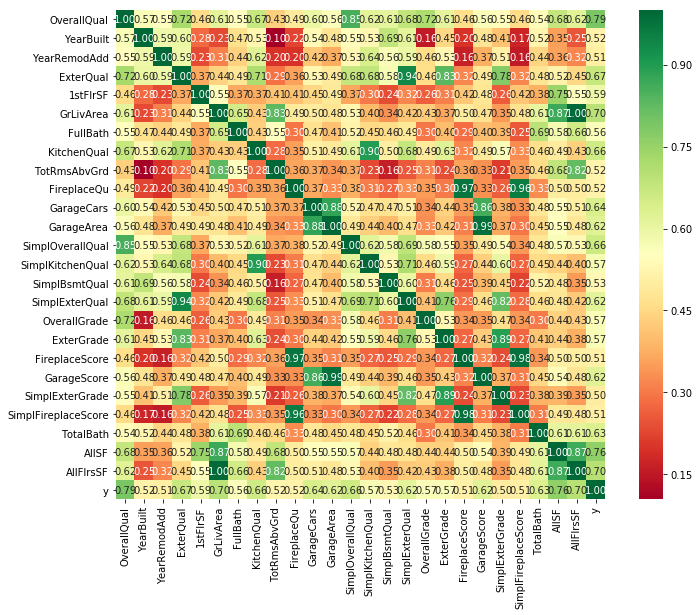

In [14]:
corrmat = df.corr()
top_corrcorrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["y"])>0.5]
plt.figure(figsize=(12,9))
sns.heatmap(df[top_corr_features].corr(),annot=True,square=True, fmt='.2f',cmap="RdYlGn")
plt.show()


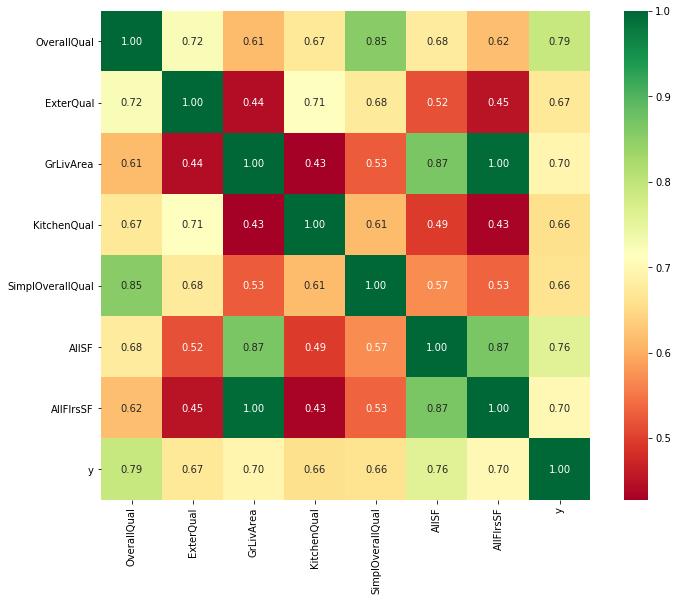

In [15]:
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["y"])>0.65]
plt.figure(figsize=(12,9))
sns.heatmap(df[top_corr_features].corr(),annot=True,square=True, fmt='.2f',cmap="RdYlGn")
plt.show()

In [16]:
df.describe()

,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,y
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,9.110966,1.096946,1.514843,1.609088,1.367315,6.099315,1.869266,7.586821,7.593756,...,0.083562,0.002055,0.867808,0.069178,0.002740,0.008219,0.013699,0.820548,0.085616,180921.195890
std,34.664304,0.517369,0.025948,0.143705,0.013369,0.087221,1.382997,0.168400,0.015389,0.010424,...,0.276824,0.045299,0.338815,0.253844,0.052289,0.090317,0.116277,0.383862,0.279893,79442.502883
min,0.000000,7.170888,0.693147,0.693147,1.098612,0.693147,1.000000,0.693147,7.535297,7.576097,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,42.000000,8.929898,1.098612,1.386294,1.609438,1.386294,5.000000,1.791759,7.578145,7.584773,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,129975.000000
50%,63.000000,9.156887,1.098612,1.609438,1.609438,1.386294,6.000000,1.791759,7.587817,7.598399,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,163000.000000
75%,79.000000,9.358976,1.098612,1.609438,1.609438,1.386294,7.000000,1.945910,7.601402,7.603399,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,214000.000000
max,313.000000,12.279537,1.098612,1.609438,1.609438,1.386294,10.000000,2.302585,7.606387,7.606387,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,755000.000000


### 問題２：ホールド・アウト法によるデータの分割をしてください。
条件：テストデータの割合は3割、random_stateは0、変数は「X_train, X_test, y_train, y_test」を使用

In [17]:
X = df.loc[:, ['OverallQual', 'AllSF']].values
y = df.loc[:, ['y']].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [19]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1460, 2)
(1460, 1)
(1022, 2)
(1022, 1)
(438, 2)
(438, 1)


### 問題３：線形回帰モデルを作成してください。
 - モジュールのインポート
 - インスタンスの生成
 - モデルへのfit
 - scoreの表示

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [21]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
print(lr.intercept_)
print(lr.coef_)

[-863505.35460303]
[[  28454.79207147  111545.06235041]]


In [23]:
print('R^2')
print('train: %.3f' % lr.score(X_train, y_train))
print('test : %.3f' % lr.score(X_test, y_test))

R^2
train: 0.724
test : 0.705


In [24]:
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

# 自由度調整済み決定係数を出力
print('adjusted R^2')
print('train: %3f' % adjusted(lr.score(X_train, y_train), len(y_train), 2))
print('test : %3f' % adjusted(lr.score(X_test, y_test), len(y_test), 2))

adjusted R^2
train: 0.723543
test : 0.703187


In [39]:
df_pickup = df.loc[:, ['OverallQual', 'ExterQual','GrLivArea','KitchenQual','SimplOverallQual','AllSF','AllFlrsSF','y']]

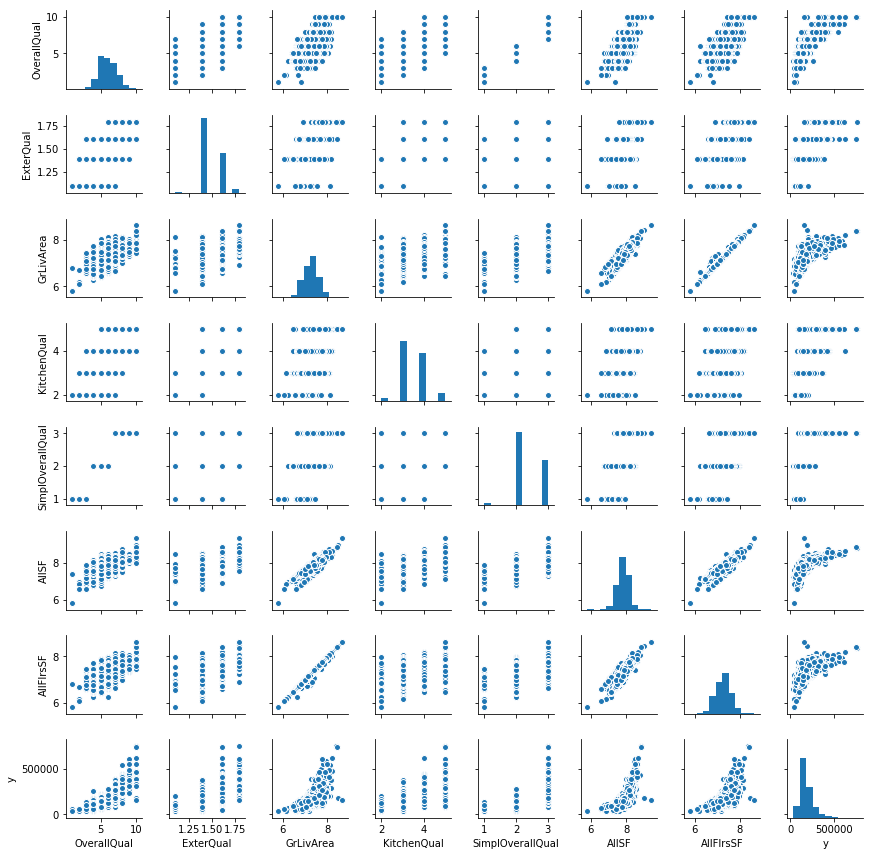

In [42]:
sns.pairplot(df_pickup, size=1.5)
plt.show()

In [87]:
X_1 = df.loc[:, ['OverallQual','ExterQual','GrLivArea','KitchenQual','SimplOverallQual','AllSF','AllFlrsSF']].values
y_1 = df.loc[:, ['y']].values

In [88]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size = 0.3, random_state = 0)
lr.fit(X_1_train, y_1_train)
print('R^2')
print('train: %.3f' % lr.score(X_1_train, y_1_train))
print('test : %.3f' % lr.score(X_1_test, y_1_test))
print('adjusted R^2')
print('train: %3f' % adjusted(lr.score(X_1_train, y_train), len(y_1_train), 2))
print('test : %3f' % adjusted(lr.score(X_1_test, y_1_test), len(y_1_test), 2))

R^2
train: 0.760
test : 0.733
adjusted R^2
train: 0.759611
test : 0.732109


### 問題４：Ridge回帰モデルを作成してください。
 - モジュールのインポート
 - インスタンスの生成（引数：alpha=10）
 - モデルへのfit
 - テストデータでのscoreの表示

In [86]:
from sklearn.linear_model import Ridge     

In [ ]:
model_ridge = Ridge(alpha=10)  

In [ ]:
ridge = model_ridge.fit(X_train, y_train)  

In [ ]:
print('R^2')
print('train: %.3f' % ridge.score(X_train, y_train))
print('test : %.3f' % ridge.score(X_test, y_test))

### 問題５：LASSOモデルを作成してください。
 - モジュールのインポート
 - インスタンスの生成（引数：alpha=200）
 - モデルへのfit
 - テストデータでのscoreの表示

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
model_lasso = Lasso(alpha=200)  

In [ ]:
lasso = model_lasso.fit(X_train, y_train)  

In [ ]:
print('R^2')
print('train: %.3f' % lasso.score(X_train, y_train))
print('test : %.3f' % lasso.score(X_test, y_test))

### 問題６：Elastic Netモデルを作成してください。
 - モジュールのインポート
 - インスタンスの生成（引数：alpha=0.1, l1_ratio=0.9）
 - モデルへのfit
 - scoreの表示

In [ ]:
from sklearn.linear_model import ElasticNet  

In [ ]:
model_en= ElasticNet(alpha=0.1, l1_ratio=0.9) 

In [ ]:
elanet = model_en.fit(X_train, y_train) 

In [ ]:
print('R^2')
print('train: %.3f' % elanet.score(X_train, y_train))
print('test : %.3f' % elanet.score(X_test, y_test))